In [919]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import scipy

This data was pulled from a MySQL Database that holds UFCStats.com Historical Data

In [920]:
df_fw = pd.read_csv('fw_historical.csv', error_bad_lines=False)
df_fw.dropna()

#-certain rounds have little to no grappling leading to a '--' entry instead of a numeral

df_fw = df_fw.loc[df_fw.control_time != '--']

# Reformat 'Control Time' to be in Seconds instead of Minutes:Seconds

df_fw['seconds'] = df_fw['control_time'].str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw['control_time'].str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(dtype=int)
df_fw['minutes'] = df_fw['minutes'].astype(dtype=int)

df_fw['control_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])

#  Reformat 'Ending Time' to be Seconds instead of Minutes:Seconds


df_fw['seconds'] = df_fw.ending_time.str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw.ending_time.str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(int)
df_fw['minutes'] = df_fw['minutes'].astype(int)

df_fw['ending_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw.loc[df_fw.round_number != df_fw.ending_round,'ending_time'] = 300

df_fw['standing_time'] = df_fw.ending_time - df_fw.control_time

print(df_fw.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

C:\Users\Anthony Aleman\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


With recent fights in the UFC like Calvin Kattar v. Giga Chikadze I wanted to shine a light on the statistical aspect of these fighters that compete in the featherweight division of the UFC.

In [921]:
df_fw.shape

(978, 42)

This dataframe contains 978 rows of data which represent singular rounds of a fight and 42 columns that focus on the striking, grappling as well as descriptive aspects as they relate to the round or the fight as a whole

In [922]:
df_fw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   fight_id                                978 non-null    int64 
 1   fight_title                             978 non-null    object
 2   winning_fighter_name                    978 non-null    object
 3   losing_fighter_name                     978 non-null    object
 4   weight_class                            978 non-null    object
 5   method_of_victory                       978 non-null    object
 6   specific_victory_details                300 non-null    object
 7   ending_round                            978 non-null    int64 
 8   ending_time                             978 non-null    int32 
 9   fight_url                               978 non-null    object
 10  unique_round_id                         978 non-null    int64 
 11  unique

In [923]:
# creating the group frame

group_frame_fw = df_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_fw.head(30)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Akira Corassani,32,11,24,4,5,0,1,0,229
1,Alex Caceres,580,250,509,87,44,20,40,2,4176
2,Alex White,180,81,137,47,18,8,14,1,917
3,Alexander Volkanovski,513,283,393,58,135,27,46,3,2730
4,Alexandre Franca Nogueira,23,4,21,0,4,0,2,0,481
5,Andre Fili,1055,385,984,84,88,67,34,3,5655
6,Andy Ogle,141,48,117,33,8,16,1,0,672
7,Anistavio Medeiros,18,8,12,0,6,0,0,0,132
8,Arnold Allen,549,230,506,64,37,38,20,2,3721
9,Artem Lobov,813,333,621,102,126,6,30,0,4719


This data frame groups each fighter by their career totals. The columns breakdown striking by strike location mixing, and striking location i.e sig. Head strikes, body strikes, legs stries and standing strikes, clinch strikes, and ground strikes.

In [924]:
group_frame_fw['head_ratio'] = group_frame_fw.significant_strikes_head_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['body_ratio'] = group_frame_fw.significant_strikes_body_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['leg_ratio'] = group_frame_fw.significant_strikes_leg_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)

#-to help numerically describe how a fighter mixes their striking location on
#-an opponent we create a ratio that compares each location to each other (head, body, legs)


In [925]:
ratio_frame_fw = group_frame_fw[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_fw.head(148)

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Akira Corassani,0.727273,0.121212,0.151515
1,Alex Caceres,0.795312,0.135937,0.068750
2,Alex White,0.678218,0.232673,0.089109
3,Alexander Volkanovski,0.670648,0.098976,0.230375
4,Alexandre Franca Nogueira,0.840000,0.000000,0.160000
...,...,...,...,...
143,Yair Rodriguez,0.747021,0.123740,0.129239
144,Yaotzin Meza,0.704918,0.131148,0.163934
145,Yui Chul Nam,0.700000,0.227778,0.072222
146,Zabit Magomedsharipov,0.753425,0.121005,0.125571


in order to better analyze the distribution of each fighter I will use a histogram plot to display the variance.

In [926]:
ratio_frame_fw.loc[ ratio_frame_fw.fighter_name == "Alexander Volkanovski"]


,fighter_name,head_ratio,body_ratio,leg_ratio
3,Alexander Volkanovski,0.670648,0.098976,0.230375


In [927]:
ratio_frame_fw.loc[ ratio_frame_fw.fighter_name == "Max Holloway"]


,fighter_name,head_ratio,body_ratio,leg_ratio
92,Max Holloway,0.855621,0.114544,0.029835


In [928]:
ratio_frame_fw.loc[ ratio_frame_fw.fighter_name == "Brian Ortega"]


,fighter_name,head_ratio,body_ratio,leg_ratio
13,Brian Ortega,0.905549,0.076741,0.01771


In [929]:
ratio_frame_fw.loc[ ratio_frame_fw.fighter_name == "Calvin Kattar"]


,fighter_name,head_ratio,body_ratio,leg_ratio
14,Calvin Kattar,0.874109,0.07601,0.049881


In [930]:
ratio_frame_fw.loc[ ratio_frame_fw.fighter_name == "Chan Sung Jung"]


,fighter_name,head_ratio,body_ratio,leg_ratio
16,Chan Sung Jung,0.928846,0.040385,0.030769


In [931]:
ratio_frame_fw.loc[ ratio_frame_fw.fighter_name == "Yair Rodriguez"]


,fighter_name,head_ratio,body_ratio,leg_ratio
143,Yair Rodriguez,0.747021,0.12374,0.129239


In [932]:
ratio_frame_fw.loc[ ratio_frame_fw.fighter_name == "Josh Emmett"]


,fighter_name,head_ratio,body_ratio,leg_ratio
70,Josh Emmett,0.820513,0.115385,0.064103


Skew: -0.9039665942157655


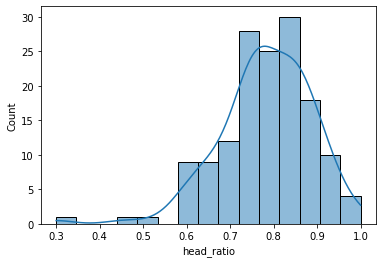

In [933]:
# Moderately Negative Skew
sns.histplot(data=ratio_frame_fw, x="head_ratio", kde=True)
print(f'Skew: {ratio_frame_fw.head_ratio.skew()}')

Skew: -2.101446609482947


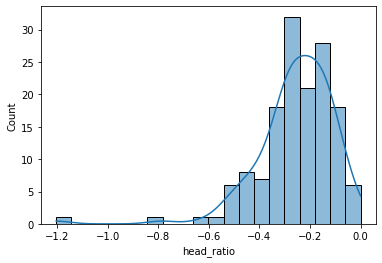

In [934]:
# natural log
log_head = np.log(ratio_frame_fw.head_ratio)
sns.histplot(data=log_head, kde=True)
print(f'Skew: {log_head.skew()}')


Skew: -1.405551946368515


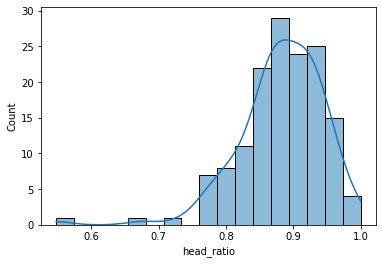

In [935]:
# Square Root Transform
head_sqrt = np.sqrt(ratio_frame_fw['head_ratio'])
head_sqrt.skew()
sns.histplot(data=head_sqrt, kde=True)
print(f'Skew: {head_sqrt.skew()}')

Skew: -0.005816077652601174


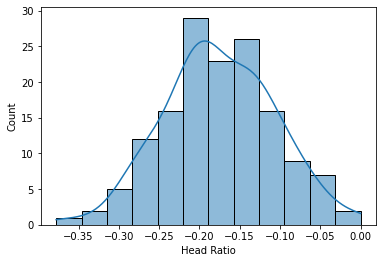

In [936]:
# Box Cox Transform
head_boxcox = scipy.stats.boxcox(ratio_frame_fw['head_ratio'])[0]
pd.Series(head_boxcox).skew()
sns.histplot(data=head_boxcox, kde=True)
plt.xlabel('Head Ratio')
print(f'Skew: {pd.Series(head_boxcox).skew()}')

In [937]:
# Who is causing this skew?

skew_table_head = ratio_frame_fw.loc[ ratio_frame_fw.head_ratio < 0.6]
skew_table_head[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio']]

,fighter_name,head_ratio,body_ratio,leg_ratio
68,Jordan Rinaldi,0.586538,0.125000,0.288462
86,Mackens Semerzier,0.583333,0.166667,0.250000
89,Mark Eddiva,0.532468,0.168831,0.298701
112,Polo Reyes,0.300000,0.600000,0.100000
125,Ryan Hall,0.455000,0.400000,0.145000
133,Steven Peterson,0.580645,0.225806,0.193548


This graph shows that a majority of fighters focus a majority of their attacks on the head. Though skewed moderately left due to data points like Jordan Rinaldi and Steven Peterson, the multi-faceted nature of mixed martial arts allows for multiple win conditions other than the KO. Using this information we can see the patterns in striking that appear with a majority of fighters focusing 70% - 90% of their significant strikes to the head. Though fighters may share similar strike mixing ratios these numbers do not reflect the actual style of a fighter thus visual tape study is needed in conjunction

<AxesSubplot:xlabel='body_ratio', ylabel='Count'>

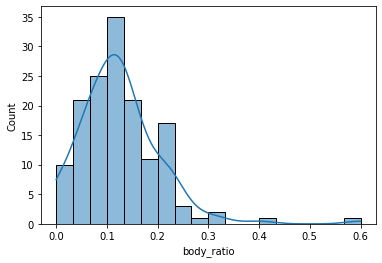

In [938]:
sns.histplot(data=ratio_frame_fw, x="body_ratio", kde=True)
# Faily Symmetrical

Skew: nan


C:\Users\Anthony Aleman\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


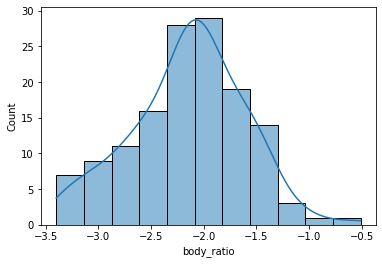

In [939]:
# natural log
log_body = np.log(ratio_frame_fw.body_ratio)
sns.histplot(data=log_body, kde=True)
print(f'Skew: {log_body.skew()}')


Skew: -0.5682152496782775


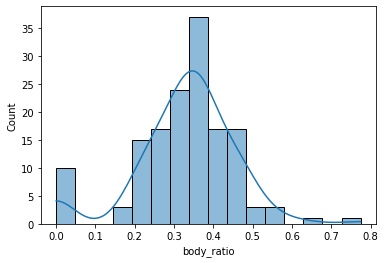

In [940]:
# Square Root Transform
body_sqrt = np.sqrt(ratio_frame_fw['body_ratio'])
body_sqrt.skew()
sns.histplot(data=body_sqrt, kde=True)
print(f'Skew: {body_sqrt.skew()}')

Mean: 0.09183086899975801
Median: 0.07652382219856269


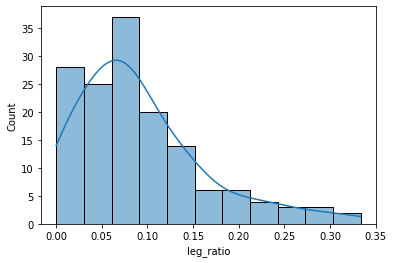

In [941]:
sns.histplot(data=ratio_frame_fw, x="leg_ratio", kde=True)
print(f'Mean: {ratio_frame_fw.leg_ratio.mean()}')
print(f'Median: {ratio_frame_fw.leg_ratio.median()}')

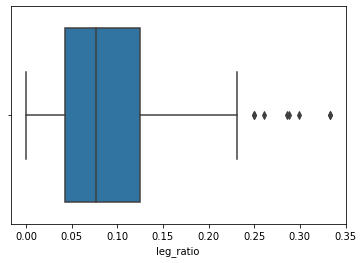

In [942]:
sns.boxplot(data=ratio_frame_fw, x="leg_ratio", )
# remove outliers
ratio_frame_fw = ratio_frame_fw.loc[ratio_frame_fw.leg_ratio < 0.27]

Mean: 0.08427569805888388
Median: 0.07380073800738007


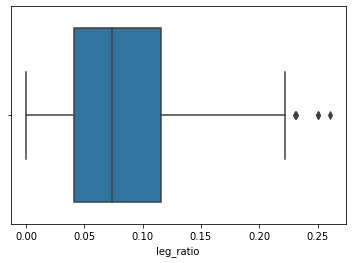

In [943]:
sns.boxplot(data=ratio_frame_fw, x="leg_ratio", )
print(f'Mean: {ratio_frame_fw.leg_ratio.mean()}')
print(f'Median: {ratio_frame_fw.leg_ratio.median()}')

Skew: nan


C:\Users\Anthony Aleman\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


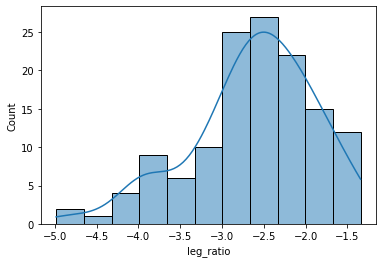

In [944]:
# natural log
log_leg = np.log(ratio_frame_fw.leg_ratio)
sns.histplot(data=log_leg, kde=True)
print(f'Skew: {log_leg.skew()}')

Skew: -0.3933968720649582


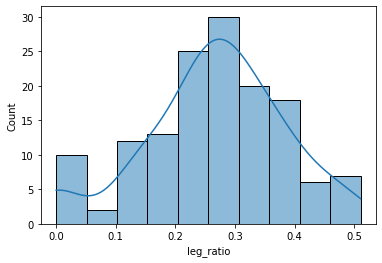

In [945]:
# Square Root Transform
leg_sqrt = np.sqrt(ratio_frame_fw['leg_ratio'])
leg_sqrt.skew()
sns.histplot(data=leg_sqrt, kde=True)
print(f'Skew: {leg_sqrt.skew()}')

In [946]:
# lets analyze the Skew and Kurtosis of Strike Mixing
ratio_frame_fw.agg(['skew', 'kurtosis']).transpose()

# Fairly Symmetrical -> -0.5 <-> 0.5
# Moderate Skew ->      -0.5 <-> -1.0 and 0.5 <-> 1.0
# Highly Skewed ->      Greater than 1.0 and Less than -1.0

,skew,kurtosis
head_ratio,-0.995246,3.119483
body_ratio,1.820577,7.864926
leg_ratio,0.859242,0.417094


In [947]:
#STRIKE LOCATION
location_ratio_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [948]:
location_ratio_fw['standing_ratio'] = location_ratio_fw.significant_strikes_standing_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['ground_ratio'] = location_ratio_fw.significant_strikes_ground_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['clinch_ratio'] = location_ratio_fw.significant_strikes_clinch_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)

print('Strike Location')
location_ratio_fw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Akira Corassani,0.969697,0.000000,0.030303
1,Alex Caceres,0.906250,0.031250,0.062500
2,Alex White,0.891089,0.039604,0.069307
3,Alexander Volkanovski,0.875427,0.046075,0.078498
4,Alexandre Franca Nogueira,0.920000,0.000000,0.080000
...,...,...,...,...
143,Yair Rodriguez,0.808433,0.143905,0.047663
144,Yaotzin Meza,0.918033,0.000000,0.081967
145,Yui Chul Nam,0.500000,0.183333,0.316667
146,Zabit Magomedsharipov,0.831050,0.127854,0.041096


In [949]:
location_ratio_fw.loc[ location_ratio_fw.fighter_name == "Alexander Volkanovski"]


,fighter_name,significant_strikes_standing_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,standing_ratio,ground_ratio,clinch_ratio
3,Alexander Volkanovski,513,27,46,0.875427,0.046075,0.078498


<AxesSubplot:xlabel='standing_ratio', ylabel='Count'>

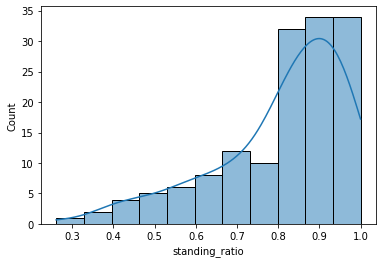

In [950]:
sns.histplot(data=location_ratio_fw, x="standing_ratio", kde=True)

<AxesSubplot:xlabel='ground_ratio', ylabel='Count'>

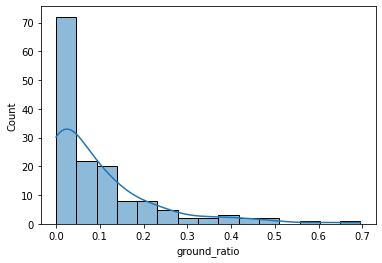

In [951]:
sns.histplot(data=location_ratio_fw, x="ground_ratio", kde=True)

<AxesSubplot:xlabel='clinch_ratio', ylabel='Count'>

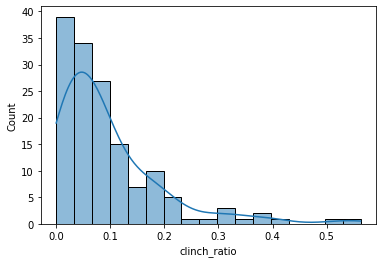

In [952]:
sns.histplot(data=location_ratio_fw, x="clinch_ratio", kde=True)

In [953]:
# Turn standing time to minutes
group_frame_fw['standing_time']=group_frame_fw.standing_time/60

In [954]:
#SApSM
sapsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [955]:
#SApSM_Ratio
sapsm_fw['SApSM'] = sapsm_fw.significant_strikes_standing_attempted / sapsm_fw.standing_time
print('Standing Attempts per Standing minute')
print(sapsm_fw)

Standing Attempts per Standing minute
                   fighter_name  significant_strikes_standing_attempted  \
0               Akira Corassani                                      32   
1                  Alex Caceres                                     580   
2                    Alex White                                     180   
3         Alexander Volkanovski                                     513   
4    Alexandre Franca Nogueira                                       23   
..                          ...                                     ...   
143              Yair Rodriguez                                     882   
144                Yaotzin Meza                                      56   
145                Yui Chul Nam                                      90   
146       Zabit Magomedsharipov                                     364   
147            Zubaira Tukhugov                                      22   

     standing_time  knockdowns      SApSM  
0         3.81666

<AxesSubplot:xlabel='SApSM', ylabel='Count'>

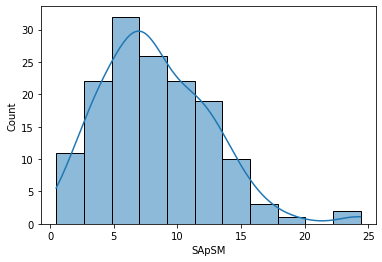

In [956]:
sns.histplot(data=sapsm_fw, x="SApSM", kde=True)

Skew: 0.3421823183341443


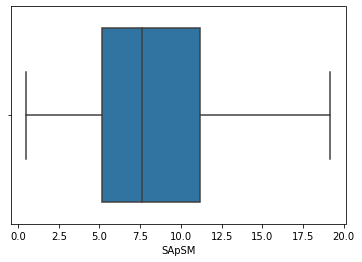

In [957]:
sns.boxplot(data=filtered_sapsm, x="SApSM")
print(f'Skew: {filtered_sapsm.SApSM.skew()}')

filtered_sapsm = filtered_sapsm.loc[filtered_sapsm.SApSM < 20]

Skew: 0.3421823183341443
Mean: 8.146822114442172
Median: 7.635460389989905


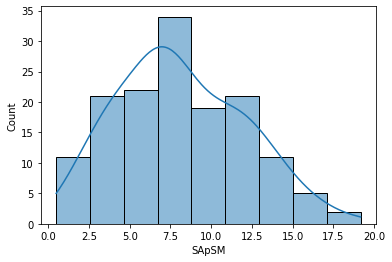

In [958]:
print(f'Skew: {filtered_sapsm.SApSM.skew()}')
sns.histplot(data=filtered_sapsm, x="SApSM", kde=True)
print(f'Mean: {filtered_sapsm.SApSM.mean()}')
print(f'Median: {filtered_sapsm.SApSM.median()}')

In [959]:
print(f'Average strike Attempts per standing minute of FW: {sapsm_fw.SApSM.mean()}')

Average strike Attempts per standing minute of FW: 8.364267965950392


In [960]:
#SLpSM
slpsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [961]:
#SLpSM Ratio
slpsm_fw['SLpSM'] = slpsm_fw.significant_strikes_standing_landed / slpsm_fw.standing_time
print('Standing Lands per standing minute')
print(slpsm_fw)

Standing Lands per standing minute
                   fighter_name  significant_strikes_standing_landed  \
0               Akira Corassani                                   11   
1                  Alex Caceres                                  250   
2                    Alex White                                   81   
3         Alexander Volkanovski                                  283   
4    Alexandre Franca Nogueira                                     4   
..                          ...                                  ...   
143              Yair Rodriguez                                  366   
144                Yaotzin Meza                                   21   
145                Yui Chul Nam                                   26   
146       Zabit Magomedsharipov                                  159   
147            Zubaira Tukhugov                                   15   

     standing_time  knockdowns     SLpSM  
0         3.816667           0  2.882096  
1        69.60

Skew: 1.0000624092708055


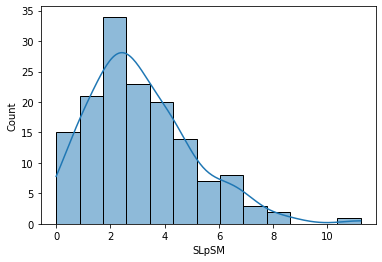

In [962]:
sns.histplot(data=slpsm_fw, x="SLpSM", kde=True)
print(f'Skew: {slpsm_fw.SLpSM.skew()}')

<AxesSubplot:xlabel='SLpSM'>

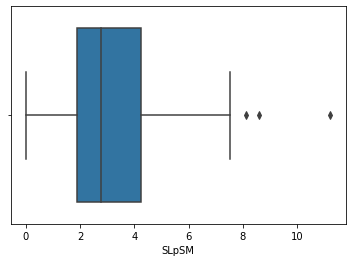

In [963]:
sns.boxplot(data=slpsm_fw, x="SLpSM")

In [964]:
slpsm_fw_filtered = slpsm_fw.loc[slpsm_fw.SLpSM < 8]


Skew: 0.542772814165972


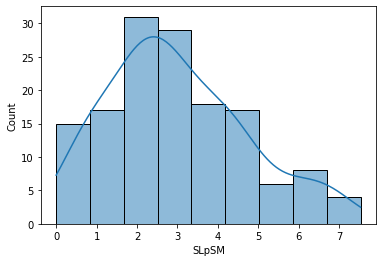

In [965]:
sns.histplot(data=slpsm_fw_filtered, x="SLpSM", kde=True)
print(f'Skew: {slpsm_fw_filtered.SLpSM.skew()}')

<AxesSubplot:xlabel='SLpSM'>

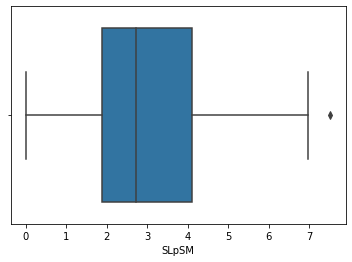

In [966]:
sns.boxplot(data=slpsm_fw_filtered, x="SLpSM")

In [967]:
#KNOCKDOWNS LANDED PER STANDING MINUTE 
kd_frame = df_fw[['standing_time', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()
kd_frame['standing_time'] = kd_frame.standing_time / 60
#StandingMinutesPerKnockdown
kd_frame['SMpKD'] = kd_frame.standing_time / kd_frame.knockdowns
print(kd_frame)

                   fighter_name  standing_time  knockdowns      SMpKD
0               Akira Corassani       3.816667           0        inf
1                  Alex Caceres      69.600000           2  34.800000
2                    Alex White      15.283333           1  15.283333
3         Alexander Volkanovski      45.500000           3  15.166667
4    Alexandre Franca Nogueira        8.016667           0        inf
..                          ...            ...         ...        ...
143              Yair Rodriguez      94.166667           3  31.388889
144                Yaotzin Meza      12.966667           0        inf
145                Yui Chul Nam      18.316667           0        inf
146       Zabit Magomedsharipov      28.833333           0        inf
147            Zubaira Tukhugov       3.200000           2   1.600000

[148 rows x 4 columns]


In [968]:
#StrikeslandedPerKnockdown

kdstrike_frame = group_frame_fw[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()

kdstrike_frame['SLpKD'] = kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.knockdowns
kdstrike_frame['standing_accuracy'] = kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.significant_strikes_standing_attempted 
kdstrike_frame['STpKD'] = kdstrike_frame.SLpKD *  (1 / ( kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.significant_strikes_standing_attempted ))
kdstrike_frame

,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,knockdowns,SLpKD,standing_accuracy,STpKD
0,Akira Corassani,11,32,0,inf,0.343750,inf
1,Alex Caceres,250,580,2,125.000000,0.431034,290.0
2,Alex White,81,180,1,81.000000,0.450000,180.0
3,Alexander Volkanovski,283,513,3,94.333333,0.551657,171.0
4,Alexandre Franca Nogueira,4,23,0,inf,0.173913,inf
...,...,...,...,...,...,...,...
143,Yair Rodriguez,366,882,3,122.000000,0.414966,294.0
144,Yaotzin Meza,21,56,0,inf,0.375000,inf
145,Yui Chul Nam,26,90,0,inf,0.288889,inf
146,Zabit Magomedsharipov,159,364,0,inf,0.436813,inf


In [969]:
accuracy_frame_fw = group_frame_fw[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame_fw['standing_accuracy'] = accuracy_frame_fw.significant_strikes_standing_landed/accuracy_frame_fw.significant_strikes_standing_attempted * 100
print('Overall Career Accuracy')


Overall Career Accuracy


Skew: -0.2545972438537127
Mean: 36.366174623797605
Median: 36.23737373737374


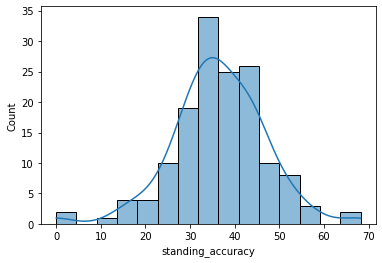

In [970]:
sns.histplot(data=accuracy_frame_fw, x="standing_accuracy", kde=True)
print(f'Skew: {accuracy_frame_fw.standing_accuracy.skew()}')
print(f'Mean: {accuracy_frame_fw.standing_accuracy.mean()}')
print(f'Median: {accuracy_frame_fw.standing_accuracy.median()}')

In [971]:
efficient_fw= df_fw[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_fight_id', 'winning_fighter_name','losing_fighter_name', 'fighter_name']].groupby(['unique_fight_id', 'fighter_name']).sum().reset_index()


perc = accuracy_frame_fw.standing_accuracy.mean() * (1/100)
#print(fw_performance.columns)


efficient_fw['significant_strikes_standing_attempted'] = efficient_fw['significant_strikes_standing_attempted'].astype(int)

#-with the average accuracy of the featherweight division we can look at an 
#-expected amount of lands given known number of attempts thrown

efficient_fw['standing_accuracy'] = efficient_fw['significant_strikes_standing_landed'] / efficient_fw['significant_strikes_standing_attempted'] * 100
efficient_fw['expected_strike__standing_lands'] = round(efficient_fw.significant_strikes_standing_attempted * perc)

# this feature is also not finished!!!!
#-With the expected amount of lands we can assume an expected a total amount of volume by multiplying the reciprocal of the average accuracy on featherweight
efficient_fw['expected_strike__standing_attempts'] = round(efficient_fw['expected_strike__standing_lands'] * (1 / perc))

efficient_fw['expected_accuracy'] = efficient_fw.expected_strike__standing_lands / efficient_fw.expected_strike__standing_attempts * 100
#-Finally we have standing strikes efficiency which ranks how good a striking performance was based on how much you hit your opponent
efficient_fw['standing_efficiency'] = efficient_fw.significant_strikes_standing_landed / efficient_fw.expected_strike__standing_lands

#-With a known amount of striking lands we can then multiply the known number of landed shots with the inverse of the striking
#-Accuracy percentage. This will return the expected standing strikes thrown of an average featherweight.
#efficient_fw = efficient_fw[['expected_strike__standing_attempts', 'expected_strike__standing_lands', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed' ]]
#This feature is unfinished!!!!
#efficient_fw['volume_compare'] = efficient_fw['significant_strikes_standing_attempted'] / efficient_fw['expected_strike__standing_attempts']

efficient_fw['sig_strike_missed'] = efficient_fw.significant_strikes_standing_attempted - efficient_fw.significant_strikes_standing_landed  
efficient_fw['expected_sig_strike_missed'] = efficient_fw.expected_strike__standing_attempts - efficient_fw.expected_strike__standing_lands
efficient_fw['expected_missing_accuracy'] = efficient_fw.sig_strike_missed/ efficient_fw.expected_sig_strike_missed
efficient_fw
efficient_fw = efficient_fw.loc[efficient_fw.standing_efficiency > 0.2]
efficient_fw

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,expected_accuracy,standing_efficiency,sig_strike_missed,expected_sig_strike_missed,expected_missing_accuracy
0,69,Dan Ige,68,28,41.176471,25.0,69.0,36.231884,1.120000,40,44.0,0.909091
1,69,Mirsad Bektic,54,14,25.925926,20.0,55.0,36.363636,0.700000,40,35.0,1.142857
2,78,Chan Sung Jung,18,8,44.444444,7.0,19.0,36.842105,1.142857,10,12.0,0.833333
3,78,Frankie Edgar,14,9,64.285714,5.0,14.0,35.714286,1.800000,5,9.0,0.555556
4,80,Charles Jourdain,115,52,45.217391,42.0,115.0,36.521739,1.238095,63,73.0,0.863014
...,...,...,...,...,...,...,...,...,...,...,...,...
391,3200,Kron Gracie,10,2,20.000000,4.0,11.0,36.363636,0.500000,8,7.0,1.142857
392,3202,Andre Fili,226,98,43.362832,82.0,225.0,36.444444,1.195122,128,143.0,0.895105
393,3202,Myles Jury,134,72,53.731343,49.0,135.0,36.296296,1.469388,62,86.0,0.720930
394,3212,Gabriel Benitez,72,24,33.333333,26.0,71.0,36.619718,0.923077,48,45.0,1.066667


<AxesSubplot:xlabel='standing_efficiency'>

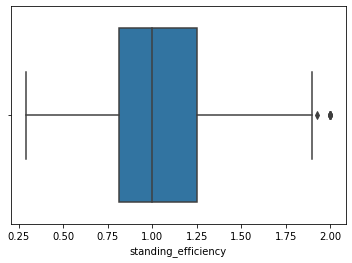

In [972]:
sns.boxplot(data=efficient_fw, x="standing_efficiency",)


<AxesSubplot:xlabel='standing_efficiency', ylabel='Density'>

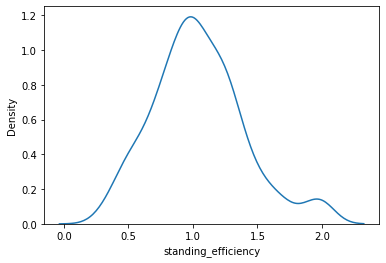

In [973]:
sns.kdeplot(data=efficient_fw, x="standing_efficiency")


<AxesSubplot:xlabel='expected_missing_accuracy'>

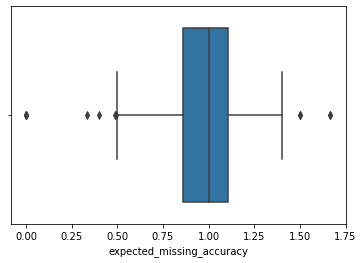

In [974]:
sns.boxplot(data=efficient_fw, x="expected_missing_accuracy",)


<AxesSubplot:xlabel='expected_missing_accuracy', ylabel='Count'>

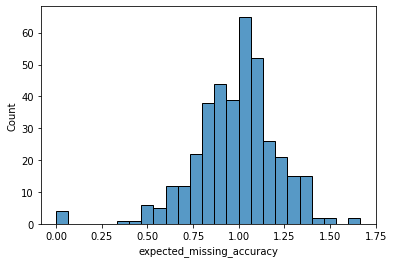

In [975]:
sns.histplot(data=efficient_fw, x="expected_missing_accuracy")

In [976]:
efficient_fw.loc[efficient_fw.fighter_name == 'Max Holloway']

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,expected_accuracy,standing_efficiency,sig_strike_missed,expected_sig_strike_missed,expected_missing_accuracy
8,114,Max Holloway,73,30,41.095890,27.0,74.0,36.486486,1.111111,43,47.0,0.914894
69,690,Max Holloway,301,132,43.853821,109.0,300.0,36.333333,1.211009,169,191.0,0.884817
222,1910,Max Holloway,181,82,45.303867,66.0,181.0,36.464088,1.242424,99,115.0,0.860870
243,2074,Max Holloway,29,14,48.275862,11.0,30.0,36.666667,1.272727,15,19.0,0.789474
287,2508,Max Holloway,319,120,37.617555,116.0,319.0,36.363636,1.034483,199,203.0,0.980296
305,2648,Max Holloway,159,46,28.930818,58.0,159.0,36.477987,0.793103,113,101.0,1.118812
341,2888,Max Holloway,149,61,40.939597,54.0,148.0,36.486486,1.129630,88,94.0,0.936170
385,3173,Max Holloway,479,281,58.663883,174.0,478.0,36.401674,1.614943,198,304.0,0.651316


In [977]:
fw_expected_by_round = df_fw[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_round_id', 'winning_fighter_name','losing_fighter_name', 'fighter_name']].groupby(['unique_round_id', 'fighter_name']).sum().reset_index()
perc = 0.36
#print(fw_performance.columns)
fw_expected_by_round['significant_strikes_standing_attempted'] = fw_expected_by_round['significant_strikes_standing_attempted'].astype(int)
fw_expected_by_round['expected_strike__standing_lands'] = round(fw_expected_by_round.significant_strikes_standing_attempted * perc)

fw_expected_by_round.head(20)

,unique_round_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,expected_strike__standing_lands
0,451,Clay Guida,11,3,4.0
1,452,Thiago Tavares,7,2,3.0
2,453,Brian Ortega,29,5,10.0
3,454,Clay Guida,53,15,19.0
4,455,Brian Ortega,74,24,27.0
5,456,Clay Guida,70,23,25.0
6,457,Brian Ortega,82,31,30.0
7,458,Clay Guida,65,20,23.0
8,465,Yair Rodriguez,61,34,22.0
9,466,Jeremy Stephens,21,9,8.0


In [978]:
fw_expected_by_round['standing_efficiency'] = fw_expected_by_round.significant_strikes_standing_landed / fw_expected_by_round.expected_strike__standing_lands
fw_expected_by_round.head(20)

,unique_round_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,expected_strike__standing_lands,standing_efficiency
0,451,Clay Guida,11,3,4.0,0.750000
1,452,Thiago Tavares,7,2,3.0,0.666667
2,453,Brian Ortega,29,5,10.0,0.500000
3,454,Clay Guida,53,15,19.0,0.789474
4,455,Brian Ortega,74,24,27.0,0.888889
5,456,Clay Guida,70,23,25.0,0.920000
6,457,Brian Ortega,82,31,30.0,1.033333
7,458,Clay Guida,65,20,23.0,0.869565
8,465,Yair Rodriguez,61,34,22.0,1.545455
9,466,Jeremy Stephens,21,9,8.0,1.125000


In [979]:
#efficiency
efficient_fw_by_round = fw_expected_by_round[['standing_efficiency', 'expected_strike__standing_lands', 'unique_round_id', 'fighter_name']]

efficient_fw_by_round

,standing_efficiency,expected_strike__standing_lands,unique_round_id,fighter_name
0,0.750000,4.0,451,Clay Guida
1,0.666667,3.0,452,Thiago Tavares
2,0.500000,10.0,453,Brian Ortega
3,0.789474,19.0,454,Clay Guida
4,0.888889,27.0,455,Brian Ortega
...,...,...,...,...
973,1.600000,15.0,7476,Julian Erosa
974,1.333333,3.0,7477,Grant Dawson
975,1.000000,3.0,7478,Julian Erosa
976,1.166667,6.0,7485,Luis Pena


<AxesSubplot:xlabel='standing_efficiency', ylabel='Count'>

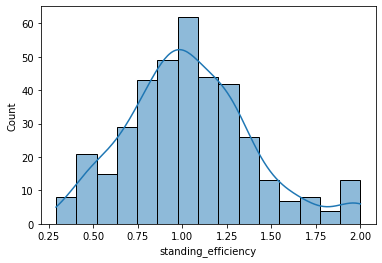

In [980]:
sns.histplot(data=efficient_fw, x="standing_efficiency", kde=True)

In [981]:
efficient_fw.loc[efficient_fw.fighter_name == "Brian Ortega"]

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,expected_accuracy,standing_efficiency,sig_strike_missed,expected_sig_strike_missed,expected_missing_accuracy
44,581,Brian Ortega,66,20,30.303030,24.0,66.0,36.363636,0.833333,46,42.0,1.095238
78,735,Brian Ortega,217,64,29.493088,79.0,217.0,36.405530,0.810127,153,138.0,1.108696
146,1342,Brian Ortega,66,17,25.757576,24.0,66.0,36.363636,0.708333,49,42.0,1.166667
224,1913,Brian Ortega,185,60,32.432432,67.0,184.0,36.413043,0.895522,125,117.0,1.068376
384,3173,Brian Ortega,282,101,35.815603,103.0,283.0,36.395760,0.980583,181,180.0,1.005556


In [982]:
efficient_fw.loc[efficient_fw.fighter_name == "Max Holloway"]

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,expected_accuracy,standing_efficiency,sig_strike_missed,expected_sig_strike_missed,expected_missing_accuracy
8,114,Max Holloway,73,30,41.095890,27.0,74.0,36.486486,1.111111,43,47.0,0.914894
69,690,Max Holloway,301,132,43.853821,109.0,300.0,36.333333,1.211009,169,191.0,0.884817
222,1910,Max Holloway,181,82,45.303867,66.0,181.0,36.464088,1.242424,99,115.0,0.860870
243,2074,Max Holloway,29,14,48.275862,11.0,30.0,36.666667,1.272727,15,19.0,0.789474
287,2508,Max Holloway,319,120,37.617555,116.0,319.0,36.363636,1.034483,199,203.0,0.980296
305,2648,Max Holloway,159,46,28.930818,58.0,159.0,36.477987,0.793103,113,101.0,1.118812
341,2888,Max Holloway,149,61,40.939597,54.0,148.0,36.486486,1.129630,88,94.0,0.936170
385,3173,Max Holloway,479,281,58.663883,174.0,478.0,36.401674,1.614943,198,304.0,0.651316


In [983]:
efficient_fw.loc[efficient_fw.fighter_name == "Alexander Volkanovski"]

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,expected_accuracy,standing_efficiency,sig_strike_missed,expected_sig_strike_missed,expected_missing_accuracy
62,647,Alexander Volkanovski,118,81,68.644068,43.0,118.0,36.440678,1.883721,37,75.0,0.493333
68,690,Alexander Volkanovski,302,156,51.655629,110.0,302.0,36.423841,1.418182,146,192.0,0.760417
334,2855,Alexander Volkanovski,93,46,49.462366,34.0,93.0,36.559140,1.352941,47,59.0,0.796610


In [984]:
#-Plot the average Standing lands for featherweight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [985]:
x = efficient_fw['expected_strike__standing_lands'].to_numpy()
y = efficient_fw['significant_strikes_standing_landed'].to_numpy()
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=1)


In [986]:
X_train= X_train.reshape(-1, 1)
Y_train= Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [987]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [988]:
Y_test.shape

(39,)

In [989]:
top_performers = efficient_fw.loc[efficient_fw['standing_efficiency'] > 1.13]
top_performers

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,expected_accuracy,standing_efficiency,sig_strike_missed,expected_sig_strike_missed,expected_missing_accuracy
2,78,Chan Sung Jung,18,8,44.444444,7.0,19.0,36.842105,1.142857,10,12.0,0.833333
3,78,Frankie Edgar,14,9,64.285714,5.0,14.0,35.714286,1.800000,5,9.0,0.555556
4,80,Charles Jourdain,115,52,45.217391,42.0,115.0,36.521739,1.238095,63,73.0,0.863014
5,80,Dooho Choi,80,36,45.000000,29.0,80.0,36.250000,1.241379,44,51.0,0.862745
6,111,Sean Soriano,14,8,57.142857,5.0,14.0,35.714286,1.600000,6,9.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
385,3173,Max Holloway,479,281,58.663883,174.0,478.0,36.401674,1.614943,198,304.0,0.651316
386,3176,Hakeem Dawodu,208,99,47.596154,76.0,209.0,36.363636,1.302632,109,133.0,0.819549
392,3202,Andre Fili,226,98,43.362832,82.0,225.0,36.444444,1.195122,128,143.0,0.895105
393,3202,Myles Jury,134,72,53.731343,49.0,135.0,36.296296,1.469388,62,86.0,0.720930


Intercept: 
 [-2.57533682]
Coefficients: 
 [[1.11763703]]
Mean squared error: 50.52
Root Mean Squared Error: 7.107649558201319
Coefficient of determination: 0.92


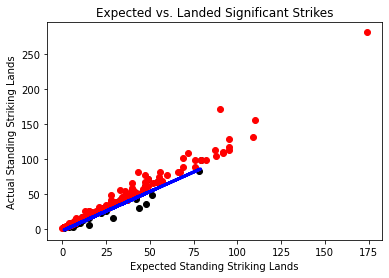

In [990]:
Y_pred = model.predict(X_test)

# Change shape of array
Y_pred.shape = (39,)

# intercept
print("Intercept: \n", model.intercept_)
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_pred, color="blue", linewidth=3)

#plt.plot(x[226], y[226], 'g*')

plt.scatter(top_performers.expected_strike__standing_lands, top_performers.significant_strikes_standing_landed, color='red')


plt.ylabel("Actual Standing Striking Lands")
plt.xlabel("Expected Standing Striking Lands")
plt.xticks()
plt.yticks()

plt.title("Expected vs. Landed Significant Strikes")

plt.show()

In [991]:
df_accur = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

df_accur['Actual'] = df_accur.Actual.abs()
df_accur['Predicted'] = df_accur.Predicted.abs()

df_accur['Accuracy'] = (df_accur.Predicted / df_accur.Actual)
df_accur

,Actual,Predicted,Accuracy
0,83,84.600351,1.019281
1,36,51.071240,1.418646
2,6,14.189219,2.364870
3,67,57.777063,0.862344
4,2,0.340063,0.170031
5,42,38.777233,0.923267
6,61,49.953603,0.818912
7,14,9.718670,0.694191
8,26,25.365589,0.975600
9,98,85.717988,0.874673


In [992]:
expected_by_target_by_fight = df_fw[[ 'significant_strikes_head_landed', 
                                     'significant_strikes_head_attempted', 
                                     'significant_strikes_body_landed', 
                                     'significant_strikes_body_attempted', 
                                     'significant_strikes_leg_landed', 
                                     'significant_strikes_leg_attempted', 
                                     'significant_strikes_ground_landed', 
                                     'significant_strikes_ground_attempted', 
                                     'significant_strikes_clinch_attempted', 
                                     'fight_id','fighter_name']].groupby(['fight_id', 'fighter_name']).sum().reset_index()

expected_by_target_by_fight['head_accuracy'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.significant_strikes_head_attempted
expected_by_target_by_fight['body_accuracy'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_by_target_by_fight.significant_strikes_body_attempted
expected_by_target_by_fight['leg_accuracy'] = expected_by_target_by_fight.significant_strikes_leg_landed / expected_by_target_by_fight.significant_strikes_leg_attempted

fw_head_accuracy = expected_by_target_by_fight['head_accuracy'].mean()
fw_body_accuracy = expected_by_target_by_fight['body_accuracy'].mean()
fw_leg_accuracy = expected_by_target_by_fight['leg_accuracy'].mean()

expected_by_target_by_fight['expected_head_strikes'] = expected_by_target_by_fight.significant_strikes_head_attempted * fw_head_accuracy
expected_by_target_by_fight['expected_body_strikes'] = expected_by_target_by_fight.significant_strikes_body_attempted * fw_body_accuracy
expected_by_target_by_fight['expected_leg_strikes'] = expected_by_target_by_fight.significant_strikes_leg_attempted * fw_leg_accuracy
expected_by_target_by_fight

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes
0,69,Dan Ige,27,70,15,17,1,1,3,4,16,0.385714,0.882353,1.000000,24.685891,11.267429,0.807364
1,69,Mirsad Bektic,14,56,3,4,0,0,0,0,6,0.250000,0.750000,NaN,19.748712,2.651160,0.000000
2,78,Chan Sung Jung,46,60,0,0,0,0,38,42,0,0.766667,NaN,NaN,21.159335,0.000000,0.000000
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,3200,Kron Gracie,1,6,0,0,1,4,0,0,0,0.166667,NaN,0.250000,2.115933,0.000000,3.229454
392,3202,Andre Fili,65,179,9,16,24,31,0,0,0,0.363128,0.562500,0.774194,63.125349,10.604639,25.028269
393,3202,Myles Jury,47,110,10,11,19,22,4,9,0,0.427273,0.909091,0.863636,38.792114,7.290689,17.761997
394,3212,Gabriel Benitez,11,55,4,8,9,9,0,0,0,0.200000,0.500000,1.000000,19.396057,5.302319,7.266272


Regression using Seaborn Regression Plot

Text(0.5, 1.0, 'Expected strike lands vs. Actual standing lands')

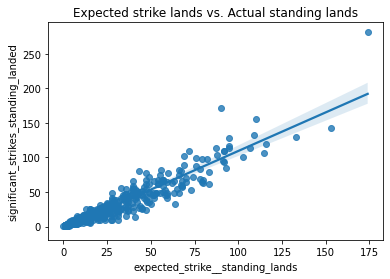

In [993]:
sns.regplot(data=efficient_fw, y='significant_strikes_standing_landed', x='expected_strike__standing_lands')
plt.title('Expected strike lands vs. Actual standing lands')

Text(0.5, 1.0, 'Expected head strike lands vs. Actual head strike lands')

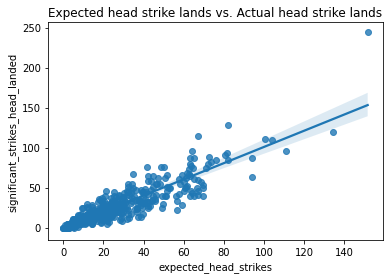

In [994]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_head_landed', x='expected_head_strikes')
plt.title('Expected head strike lands vs. Actual head strike lands')

Text(0.5, 1.0, 'Expected body strike lands vs. Actual body strike lands')

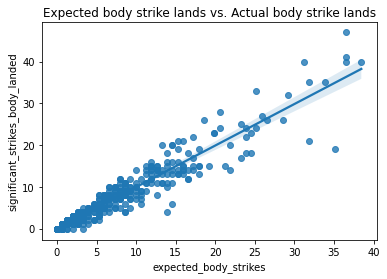

In [995]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_body_landed', x='expected_body_strikes')
plt.title('Expected body strike lands vs. Actual body strike lands')

Text(0.5, 1.0, 'Expected leg strike lands vs. Actual leg strike lands')

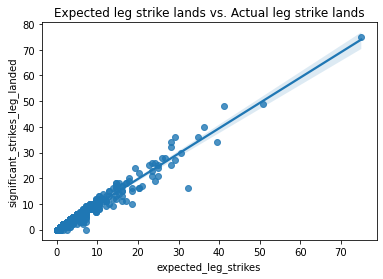

In [996]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_leg_landed', x='expected_leg_strikes')
plt.title('Expected leg strike lands vs. Actual leg strike lands')

In [997]:
expected_by_target_by_fight = expected_by_target_by_fight.dropna()
x_expected = expected_by_target_by_fight['expected_head_strikes'].to_numpy()
y_landed = expected_by_target_by_fight['significant_strikes_head_landed'].to_numpy()
X_train_head,X_test_head,y_train_head,y_test_head = train_test_split(x_expected, y_landed, test_size=0.10, train_size=0.90, random_state=3)


In [998]:
X_train_head= X_train_head.reshape(-1, 1)
y_train_head= y_train_head.reshape(-1, 1)
X_test_head = X_test_head.reshape(-1, 1)

In [999]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [1000]:
expected_by_target_by_fight

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes
0,69,Dan Ige,27,70,15,17,1,1,3,4,16,0.385714,0.882353,1.000000,24.685891,11.267429,0.807364
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908
5,80,Dooho Choi,30,80,9,11,3,3,3,6,8,0.375000,0.818182,1.000000,28.212446,7.290689,2.422091
6,111,Sean Soriano,14,21,3,3,2,2,6,6,6,0.666667,1.000000,1.000000,7.405767,1.988370,1.614727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,3190,Russell Doane,3,9,0,1,3,5,1,3,1,0.333333,0.000000,0.600000,3.173900,0.662790,4.036818
392,3202,Andre Fili,65,179,9,16,24,31,0,0,0,0.363128,0.562500,0.774194,63.125349,10.604639,25.028269
393,3202,Myles Jury,47,110,10,11,19,22,4,9,0,0.427273,0.909091,0.863636,38.792114,7.290689,17.761997
394,3212,Gabriel Benitez,11,55,4,8,9,9,0,0,0,0.200000,0.500000,1.000000,19.396057,5.302319,7.266272


In [1001]:
expected_by_target_by_fight['head_efficiency'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.expected_head_strikes
expected_by_target_by_fight['body_efficiency'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_by_target_by_fight.expected_body_strikes
expected_by_target_by_fight['leg_efficiency'] = expected_by_target_by_fight.significant_strikes_leg_landed / expected_by_target_by_fight.expected_leg_strikes




C:\Users\ANTHON~1\AppData\Local\Temp/ipykernel_6024/3715073588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_by_fight['head_efficiency'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.expected_head_strikes
C:\Users\ANTHON~1\AppData\Local\Temp/ipykernel_6024/3715073588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_by_fight['body_efficiency'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_b

In [1002]:
top_target_performers_head = expected_by_target_by_fight.loc[expected_by_target_by_fight.head_efficiency > 1.11]
top_target_performers_head

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes,head_efficiency,body_efficiency,leg_efficiency
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727,1.546706,1.508774,1.238599
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908,1.282784,0.937886,0.464475
6,111,Sean Soriano,14,21,3,3,2,2,6,6,6,0.666667,1.000000,1.000000,7.405767,1.988370,1.614727,1.890419,1.508774,1.238599
8,114,Max Holloway,58,119,14,18,2,2,3,5,61,0.487395,0.777778,1.000000,41.966014,11.930219,1.614727,1.382071,1.173491,1.238599
11,209,Frankie Edgar,76,142,6,10,8,10,58,80,1,0.535211,0.600000,0.800000,50.077092,6.627899,8.073635,1.517660,0.905264,0.990880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,3137,Jose Aldo,29,73,13,24,20,22,0,2,6,0.397260,0.541667,0.909091,25.743857,15.906958,17.761997,1.126482,0.817252,1.125999
381,3167,Jimy Hettes,16,40,13,17,5,7,1,1,36,0.400000,0.764706,0.714286,14.106223,11.267429,5.651545,1.134251,1.153768,0.884714
383,3172,Rob Whiteford,14,34,9,12,3,4,3,5,11,0.411765,0.750000,0.750000,11.990290,7.953479,3.229454,1.167611,1.131580,0.928950
385,3173,Max Holloway,244,430,41,55,5,5,1,1,10,0.567442,0.745455,1.000000,151.641900,36.453446,4.036818,1.609054,1.124722,1.238599


Intercept: 
 [-2.57533682]
Coefficients: 
 [[1.11763703]]
Mean squared error: 104.36
Root Mean Squared Error: 10.215430187531659
Coefficient of determination: 0.86


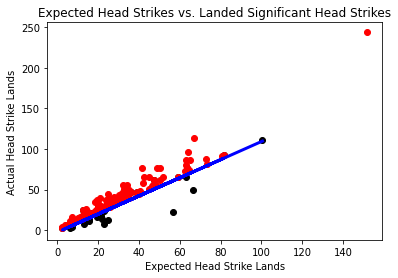

In [1003]:
Y_pred_head = regr.predict(X_test_head)

# Change shape of array
#Y_pred_head.shape = (196,)

# intercept
print("Intercept: \n", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_head, Y_pred_head))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_head, Y_pred_head)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_head, Y_pred_head))

# Plot outputs
plt.scatter(X_test_head, y_test_head, color="black")
plt.plot(X_test_head, Y_pred_head, color="blue", linewidth=3)

plt.scatter(top_target_performers_head.expected_head_strikes, top_target_performers_head.significant_strikes_head_landed, color="red")

plt.ylabel("Actual Head Strike Lands")
plt.xlabel("Expected Head Strike Lands")
plt.xticks()
plt.yticks()

plt.title("Expected Head Strikes vs. Landed Significant Head Strikes")

plt.show()

In [1011]:
x_body = expected_by_target_by_fight['expected_body_strikes'].to_numpy()
y_body = expected_by_target_by_fight['significant_strikes_body_landed'].to_numpy()
X_train_body,X_test_body,y_train_body,y_test_body = train_test_split(x_body, y_body, test_size=0.10, train_size=0.90, random_state=2)


In [1013]:
X_train_body= X_train_body.reshape(-1, 1)
y_train_body= y_train_body.reshape(-1, 1)
X_test_body = X_test_body.reshape(-1, 1)

In [1014]:
regr_body = LinearRegression()
regr_body.fit(X_train_body, y_train_body)

LinearRegression()

In [1025]:
top_target_performers_body = expected_by_target_by_fight.loc[expected_by_target_by_fight.body_efficiency > 1.1]
top_target_performers_body

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes,head_efficiency,body_efficiency,leg_efficiency
0,69,Dan Ige,27,70,15,17,1,1,3,4,16,0.385714,0.882353,1.000000,24.685891,11.267429,0.807364,1.093742,1.331271,1.238599
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727,1.546706,1.508774,1.238599
5,80,Dooho Choi,30,80,9,11,3,3,3,6,8,0.375000,0.818182,1.000000,28.212446,7.290689,2.422091,1.063360,1.234451,1.238599
6,111,Sean Soriano,14,21,3,3,2,2,6,6,6,0.666667,1.000000,1.000000,7.405767,1.988370,1.614727,1.890419,1.508774,1.238599
8,114,Max Holloway,58,119,14,18,2,2,3,5,61,0.487395,0.777778,1.000000,41.966014,11.930219,1.614727,1.382071,1.173491,1.238599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3173,Brian Ortega,87,267,16,18,7,7,0,0,10,0.325843,0.888889,1.000000,94.159040,11.930219,5.651545,0.923969,1.341132,1.238599
385,3173,Max Holloway,244,430,41,55,5,5,1,1,10,0.567442,0.745455,1.000000,151.641900,36.453446,4.036818,1.609054,1.124722,1.238599
386,3176,Hakeem Dawodu,51,146,35,48,17,18,0,0,4,0.349315,0.729167,0.944444,51.487715,31.813917,14.532543,0.990528,1.100147,1.169788
393,3202,Myles Jury,47,110,10,11,19,22,4,9,0,0.427273,0.909091,0.863636,38.792114,7.290689,17.761997,1.211586,1.371612,1.069700


Intercept: 
 [0.20489235]
Coefficients: 
 [[0.96983323]]
Mean squared error: 8.29
Root Mean Squared Error: 2.8790027064789157
Coefficient of determination: 0.92


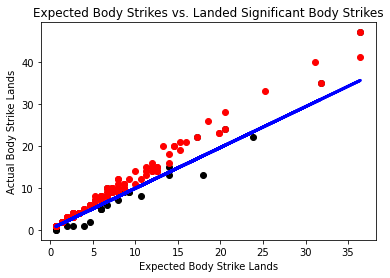

In [1026]:
Y_pred_body = regr_body.predict(X_test_body)

# Change shape of array
#Y_pred_head.shape = (196,)

# intercept
print("Intercept: \n", regr_body.intercept_)
# The coefficients
print("Coefficients: \n", regr_body.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_body, Y_pred_body))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_body, Y_pred_body)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_body, Y_pred_body))

# Plot outputs
plt.scatter(X_test_body, y_test_body, color="black")
plt.plot(X_test_body, Y_pred_body, color="blue", linewidth=3)

plt.scatter(top_target_performers_body.expected_body_strikes, top_target_performers_body.significant_strikes_body_landed, color="red")


plt.ylabel("Actual Body Strike Lands")
plt.xlabel("Expected Body Strike Lands")
plt.xticks()
plt.yticks()

plt.title("Expected Body Strikes vs. Landed Significant Body Strikes")

plt.show()

<AxesSubplot:xlabel='head_efficiency'>

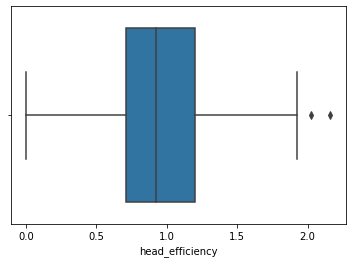

In [1008]:
sns.boxplot(data=expected_by_target_by_fight, x="head_efficiency")

<AxesSubplot:xlabel='body_efficiency'>

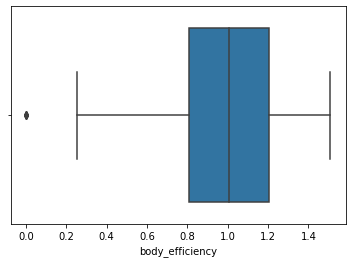

In [1009]:
sns.boxplot(data=expected_by_target_by_fight, x="body_efficiency")

<AxesSubplot:xlabel='leg_efficiency'>

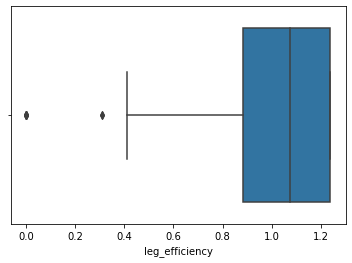

In [1010]:
sns.boxplot(data=expected_by_target_by_fight, x="leg_efficiency")